In [29]:
import sys
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install lxml
import requests
import lxml.html as lh
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
url='http://pokemondb.net/pokedex/all'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

In [31]:
#Memastikan setiap kolomnya 
[len(Z) for Z in tr_elements[:8]] 

[10, 10, 10, 10, 10, 10, 10, 10]

In [32]:
tr_elements = doc.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"#"
2:"Name"
3:"Type"
4:"Total"
5:"HP"
6:"Attack"
7:"Defense"
8:"Sp. Atk"
9:"Sp. Def"
10:"Speed"


In [33]:
for j in range(1,len(tr_elements)):
    T=tr_elements[j] 
    if len(T)!=10:
        break
    i=0

    for t in T.iterchildren():
        data=t.text_content() 
        if i>0:
            try:
                data=int(data)
            except:
                pass
        col[i][1].append(data)
        i+=1

In [34]:
[len(B) for (title,B) in col]

[1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045, 1045]

In [35]:
Dict={title:column for (title,column) in col}
data=pd.DataFrame(Dict)

In [36]:
data.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65


In [37]:
data.shape

(1045, 10)

In [38]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


<AxesSubplot:xlabel='HP', ylabel='Attack'>

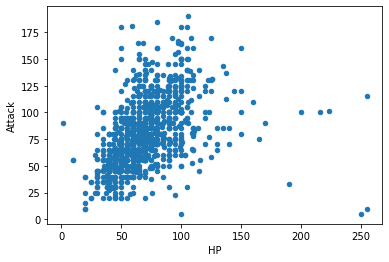

In [39]:
data.plot.scatter('HP','Attack')

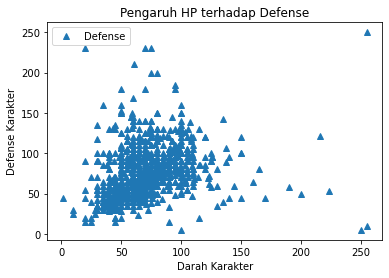

In [40]:
data.plot(x = "HP", y = "Defense", style = "^")
plt.title("Pengaruh HP terhadap Defense")
plt.xlabel("Darah Karakter")
plt.ylabel("Defense Karakter")
plt.show()

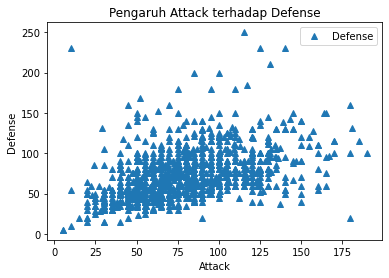

In [41]:
data.plot(x = "Attack", y = "Defense", style = "^")
plt.title("Pengaruh Attack terhadap Defense")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

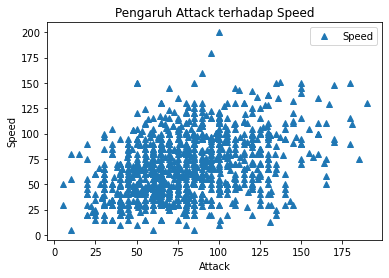

In [42]:
data.plot(x = "Attack", y = "Speed", style = "^")
plt.title("Pengaruh Attack terhadap Speed")
plt.xlabel("Attack")
plt.ylabel("Speed")
plt.show()

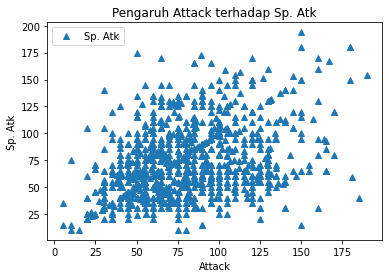

In [43]:
data.plot(x = "Attack", y = "Sp. Atk", style = "^")
plt.title("Pengaruh Attack terhadap Sp. Atk")
plt.xlabel("Attack")
plt.ylabel("Sp. Atk")
plt.show()

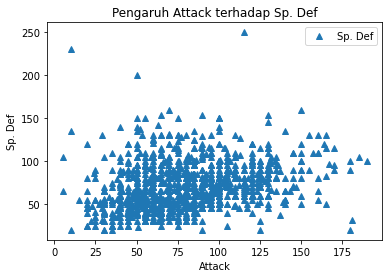

In [44]:
data.plot(x = "Attack", y = "Sp. Def", style = "^")
plt.title("Pengaruh Attack terhadap Sp. Def")
plt.xlabel("Attack")
plt.ylabel("Sp. Def")
plt.show()